# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Neste trabalho de análise de dados iremos considerear o conjunto de dados TMDB movie data. Um conjunto com aproximadamente 10.000 filmes.  As questões que queremos responder abordam quais gêneros são mais populares ao longo dos anos; quais tipos de propriedade podemos associar com filmes cuja receita é alta e por fim, *homepages* de filmes podem influenciar na popularidade? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

* Através do resultado da função info, executada abaixo, pode-se concluir que há colunas com valores nulos. Por exemplo as colunas: cast, homepages e todas as colunas tem valores abaixo do total de entrada, 10866.  
* No próximo comando se obtem a quantidade de valores nulos. Veja: df.isnull().sum().  
* Com o comando *duplicated* do pandas, verifica-se as linhas duplicadas, as quais deverão ser descartadas.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.sample(4).transpose()

,5476,6650,2969,2389
id,137093,9072,8881,55244
imdb_id,tt1204975,tt0430304,tt0892255,tt1621444
popularity,1.4966,0.773044,0.825749,0.052322
budget,28000000,64000000,30000000,0
revenue,134402450,101595121,0,1339650
original_title,Last Vegas,Little Man,Che: Part One,Bill Cunningham New York
cast,Robert De Niro|Morgan Freeman|Michael Douglas|...,Marlon Wayans|Shawn Wayans|Kerry Washington|Jo...,Benicio del Toro|DemiÃ¡n Bichir|Rodrigo Santor...,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...
homepage,NaN,http://www.littleman-movie.com/,NaN,http://billcunninghamnewyork.com/
director,Jon Turteltaub,Keenen Ivory Wayans,Steven Soderbergh,Richard Press
tagline,It's going to be legendary,Big things come in small packages,The revolution made him a legend.,"He who seeks beauty, will find it."


Uma pequena amostra aleatória revela que algumas informações estão faltando e há erros de exibição de caracteres (Exemplo: registros de ID 8107 e 9389). Alguns filmes estão com o campo *revenue* e *budget* zerados. Também é possível notar que existem campos multivalores como *genres*, *keywords*, *cast*, onde a várias informações estão separada por *pipe*.

Nota: O resultado acima foi transposto para facilitar a visualização de todos os campos.

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

É possível notar no resultado anterior que o campo *genres* possuem 23 registros nulos. Mais adiante, iremos remover os registros correspondentes, pois gênero é uma variável importante em nossa análise. 

In [5]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Apenas um registro duplicado foi encontrado. Este também será removido.


In [6]:
df[df.revenue == 0].shape

(6016, 21)

Existem **6016** registros cujo *revenue* é zero. Iremos ignorar estes registros também.

### Data Cleaning

In [7]:
df.dropna(subset=['genres'], inplace=True)
df.shape

(10843, 21)

Foi removido os registros de filmes com o campo *genres* faltando.

In [8]:
df = df[df.revenue > 0 ]
df.shape

(4850, 21)

Aqui removemos os registros com *revenue* (receita) zerada.

In [9]:
# Verifica se existem linhas totalmente vazias
df.dropna(how='all').shape != df.shape

False

In [10]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Foi encontrado um registro duplicado. A seguir, remove-se a duplicação:

In [11]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [12]:
#Através do resultado da função info, pode-se concluir que todas as colunas não contém valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
id                      4849 non-null int64
imdb_id                 4849 non-null object
popularity              4849 non-null float64
budget                  4849 non-null int64
revenue                 4849 non-null int64
original_title          4849 non-null object
cast                    4844 non-null object
homepage                1665 non-null object
director                4848 non-null object
tagline                 4385 non-null object
keywords                4614 non-null object
overview                4849 non-null object
runtime                 4849 non-null int64
genres                  4849 non-null object
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget_adj              4849 non-null flo

Ainda é possível observar alguns campos null. Com a exceção de *homepage*, todos os outros campos null não serão considerados nesta investigação e serão excluídos a seguir:

In [13]:
df.drop(['tagline','keywords', 'production_companies','director'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 17 columns):
id                4849 non-null int64
imdb_id           4849 non-null object
popularity        4849 non-null float64
budget            4849 non-null int64
revenue           4849 non-null int64
original_title    4849 non-null object
cast              4844 non-null object
homepage          1665 non-null object
overview          4849 non-null object
runtime           4849 non-null int64
genres            4849 non-null object
release_date      4849 non-null object
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 681.9+ KB


In [14]:
# convert budget and revenue columns to float
df['budget'] = df['budget'].astype('float')
df['revenue'] = df['revenue'].astype('float')
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
# save clean data
df.to_csv('movie-data.csv', index=False)

Criamos um arquivo com os dados limpos: `movie-data.csv`

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Quais gêneros são mais populares ao longo dos anos?

Para responder essa questão, foram tomados os seguintes passos:
* Obter todos os gêneros do dataframe, sem duplicação;
* Criou-se um novo dataframe de filmes por genero (genres_1);
* Para melhor análise dos dados, criou-se uma relação de algumas variáveis com gênero em um período de cinco em cinco anos (quinquenio);
* E com os dados desta relação foi gerada uma nova tabela para a conclusão dessa investigação.


In [16]:
gen_splitted = [gs.split('|') for gs in df.genres.unique()]
generos = set([g for gs in gen_splitted for g in gs])
print(generos)

{'History', 'Mystery', 'TV Movie', 'Crime', 'Action', 'Comedy', 'Western', 'Horror', 'Foreign', 'Drama', 'Science Fiction', 'Documentary', 'Animation', 'Music', 'War', 'Fantasy', 'Family', 'Thriller', 'Romance', 'Adventure'}


O conjunto **generos** obtido contém todos os gêneros encontrados. Agora é necessário agrupar os filmes em cada gênero.

In [17]:
# Obtendo filmes x gênero
movie_groups = []
for g in generos:    
    movie_gen = df[df.genres.str.contains(g)][['popularity', 'release_year', 'genres','revenue']]
    movie_gen['genres_1'] = np.repeat(g, movie_gen.shape[0])
    movie_groups.append(movie_gen)

movies = pd.concat(movie_groups)
movies.head(2)

,popularity,release_year,genres,revenue,genres_1
28,4.062293,2015,Drama|Thriller|History,88346473.0,History
42,3.079522,2015,History|Drama,34441873.0,History


Para facilitar a análise vamos agrupar os filmes de 5 em 5 anos e verificar a média da popularidade:

In [18]:
# Relação de algumas variáveis com gênero em um período de cinco em cinco anos

period = 5
movies['quiquenio'] = (movies.release_year // period)*period
movies.head(4)

,popularity,release_year,genres,revenue,genres_1,quiquenio
28,4.062293,2015,Drama|Thriller|History,88346473.0,History,2015
42,3.079522,2015,History|Drama,34441873.0,History,2015
66,2.345821,2015,Thriller|Drama|Adventure|Action|History,93820758.0,History,2015
167,0.906036,2015,History|Drama,24902723.0,History,2015


In [19]:
# Popularidade média por quinquenio
pivot_table = pd.pivot_table(movies, values='popularity', index=['quiquenio'], columns=['genres_1'], aggfunc='mean')
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
quiquenio,,,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,NaN,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,NaN,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,NaN,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,NaN,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,NaN,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,NaN,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,NaN,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.148192,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,NaN,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.077948,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,NaN,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.289664,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,NaN,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.195606,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.273628,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.222396,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,NaN,0.971859,1.177404,0.828279


É notável que os gêneros *Foreign* e *TV Movie* possuem dados incompletos e portanto podemos excluir essas colunas: 

In [20]:
# Retirando colunas com valores vazios do novo dataframe
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)
pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
quiquenio,,,,,,,,,,,,,,,,,,
1960,1.500367,1.827838,2.631987,0.938070,0.741079,NaN,0.796239,0.999265,1.987819,0.753349,1.034079,0.931615,0.573544,0.710853,NaN,1.955844,1.199529,0.769762
1965,0.980355,1.172310,2.550704,0.917042,0.752185,NaN,0.657636,1.184698,0.241283,0.690924,0.724527,0.600345,1.203608,0.692549,1.178658,0.981700,0.603066,0.573502
1970,0.587404,0.798782,2.104724,0.607834,0.959113,0.029670,0.812207,1.755999,1.407273,0.474831,1.458410,0.420142,0.768832,0.410233,1.111263,0.802186,0.417715,0.395489
1975,1.260937,1.279633,0.654268,0.635279,0.724527,0.064029,0.699907,0.588169,0.719617,0.797715,0.980788,0.629629,0.547183,0.609931,1.550173,0.940305,1.156599,0.303817
1980,1.031243,1.170096,0.538428,0.704059,0.665240,0.351799,0.603874,0.978349,0.735961,0.629624,0.613330,0.511719,0.464588,0.542461,1.145325,0.733800,0.688868,0.243985
1985,0.856970,1.012299,1.335978,0.671599,0.571668,0.168545,0.593510,0.876790,0.733901,0.550389,0.505978,0.498092,0.468399,0.585325,0.871193,0.676806,0.840255,0.619817
1990,0.807403,0.947222,1.295850,0.702961,0.983848,0.233812,0.682160,0.947814,0.974657,0.754725,0.566747,0.711961,0.658787,0.705771,0.873951,0.797536,0.881771,0.794337
1995,1.060483,1.144319,1.458253,0.724390,0.972304,0.248277,0.819076,1.044532,1.168953,0.785814,0.820874,0.556169,1.015024,0.706677,1.214455,0.992004,0.872232,0.710569
2000,1.239533,1.552073,1.445014,0.874149,0.915177,0.256732,0.823599,1.405372,2.309673,0.915827,0.857811,0.689354,0.934911,0.882684,1.328103,0.971859,1.177404,0.828279


In [21]:
pivot_table.describe()

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000
mean,1.457855,1.684044,1.629244,0.877583,1.024178,0.216046,0.844173,1.290825,1.420601,0.862793,0.871477,0.701275,0.963247,0.785912,1.774944,1.216508,1.033574,1.066183
std,1.132246,1.221697,0.676118,0.320193,0.585424,0.101677,0.316596,0.572982,0.806409,0.409810,0.279470,0.216524,0.539750,0.337827,1.537389,0.732094,0.406813,1.408559
min,0.587404,0.798782,0.538428,0.607834,0.571668,0.029670,0.593510,0.588169,0.241283,0.474831,0.505978,0.420142,0.464588,0.410233,0.871193,0.676806,0.417715,0.243985
25%,0.949509,1.111314,1.325946,0.695120,0.736941,0.184862,0.676029,0.970715,0.735446,0.675599,0.696728,0.545056,0.566954,0.603779,1.128294,0.801024,0.802408,0.528999
50%,1.150008,1.225972,1.473551,0.793809,0.931245,0.244069,0.798095,1.114615,1.288113,0.763797,0.839342,0.659491,0.851872,0.706224,1.214455,0.976780,0.989607,0.740165
75%,1.342159,1.621015,2.166664,0.922299,0.975190,0.256150,0.820207,1.453536,2.036143,0.827243,0.994111,0.827399,1.071286,0.868684,1.478101,1.155608,1.182936,0.802823
max,4.857300,5.248548,2.631987,1.776127,2.786263,0.351799,1.758922,2.790577,2.946939,2.027768,1.458410,1.176951,2.301307,1.735462,6.168163,3.259221,1.765139,5.446267


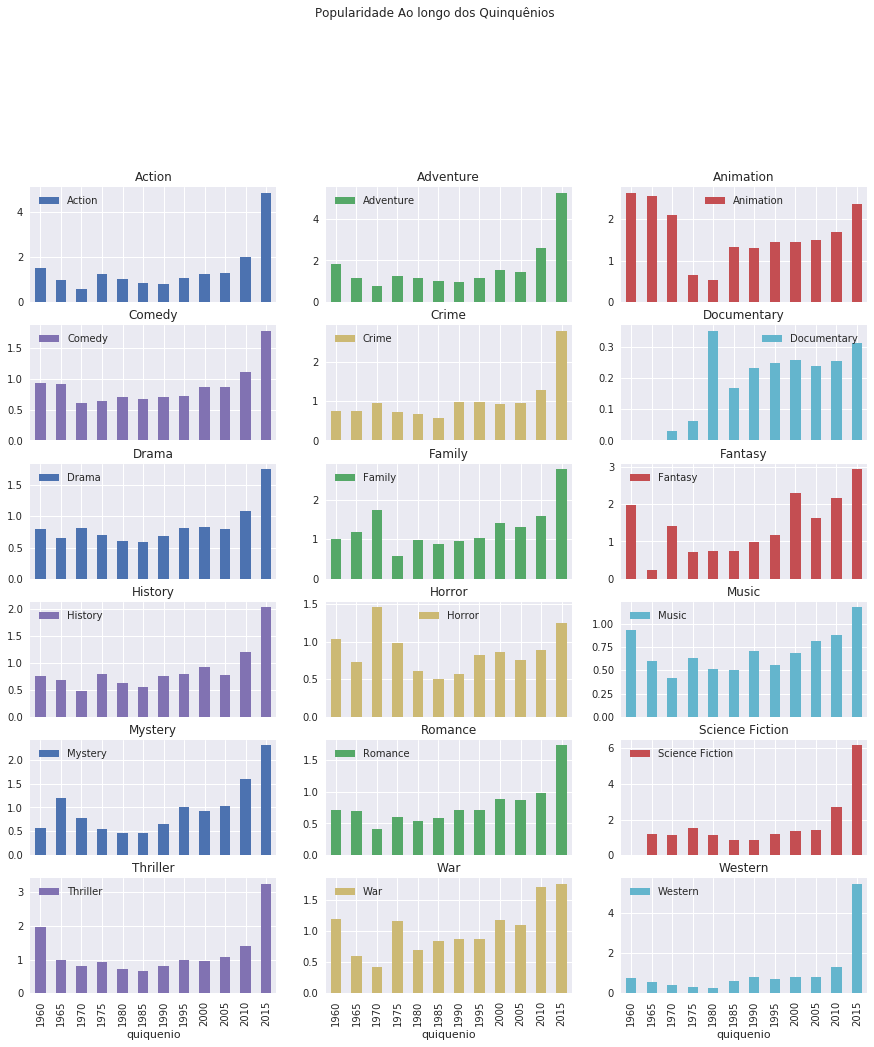

In [22]:
pivot_table.plot(kind='bar',title="Popularidade Ao longo dos Quinquênios",subplots=True,layout=(10,3),figsize=(15,25));


Pelo gráfico acima e considerando que os mais populares tem uma polularidade média próxima ou superior a 2. Tem-se, então, os seguintes resultados dos gêrenos mais populares ao longo dos anos:
* Adventure, 
* Action, 
* Fantasy, 
* Family, 
* Science Fiction


### Research Question 2 : Quais tipos de propriedades são associadas com filmes de alta receita?


In [23]:
# Obtendo arquivo limpo para a segunda investigação

df = pd.read_csv('movie-data.csv')

In [24]:
high_revenue = df[df.revenue >= 5e+8]

Nesta análise, vamos estabelecer um piso de meio bilhão para filmes de alta receita armazenado em *high_revenue*.


In [25]:
high_revenue.describe()[['popularity','budget','vote_count','vote_average','revenue','release_year']]

,popularity,budget,vote_count,vote_average,revenue,release_year
count,143.000000,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000
mean,4.630567,1.429626e+08,3166.615385,6.855944,7.951605e+08,2007.503497
std,3.937965,6.574273e+07,1774.860093,0.652581,3.098171e+08,7.397063
min,0.436803,1.050000e+07,48.000000,5.300000,5.001884e+08,1977.000000
25%,2.574915,9.500000e+07,1802.500000,6.400000,5.917672e+08,2004.500000
50%,3.655536,1.450000e+08,2952.000000,6.800000,7.163927e+08,2009.000000
75%,5.588386,1.875000e+08,3980.000000,7.400000,8.887792e+08,2013.000000
max,32.985763,3.800000e+08,9767.000000,8.100000,2.781506e+09,2015.000000


Baseado nos resultado acima verifica-se que a popularidade, o vote_count, vote_average são fatores importantes receita de um filme.  No caso da popularidade, 75% dos filmes nesta categoria tem índices maiores que *2.57*. Os atributos vote_count e voute_average seguem a mesma analogia; O *budget* também parece apontar nesta direção. 



In [26]:
# Propriedades x Revenue

colunas = ['popularity','budget','revenue','genres']
high_revenue[colunas].sort_values('revenue',ascending=False).head(15)

,popularity,budget,revenue,genres
468,9.432768,237000000.0,2.781506e+09,Action|Adventure|Fantasy|Science Fiction
3,11.173104,200000000.0,2.068178e+09,Action|Adventure|Science Fiction|Fantasy
2159,4.355219,200000000.0,1.845034e+09,Drama|Romance|Thriller
1804,7.637767,220000000.0,1.519558e+09,Science Fiction|Action|Adventure
0,32.985763,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller
4,9.335014,190000000.0,1.506249e+09,Action|Crime|Thriller
14,5.944927,280000000.0,1.405036e+09,Action|Adventure|Science Fiction
1339,5.711315,125000000.0,1.327818e+09,Adventure|Family|Fantasy
2266,6.112766,150000000.0,1.274219e+09,Animation|Adventure|Family
2269,4.946136,200000000.0,1.215440e+09,Action|Adventure|Science Fiction


A tabela acima exibe os filmes por ordem decrescente de receita. Estão presentes, no topo, filmes pertencentes as categorias *Action*, *Adventure*, *Family*,*Fantasy* correspondentes aos gêneros mais populares levantados na Questão 01. A tabela a seguir colabora com a hipótese. Logo, segundo os achados, as colunas: **'popularity','budget','revenue','genres'**, são propriedades associadas a alta receitas (revenues).

In [27]:
# Popularidade média por quinquenio
pivot_table = pd.pivot_table(movies, values='revenue', index=['quiquenio'], columns=['genres_1'], aggfunc='mean')
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)

pivot_table

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
quiquenio,,,,,,,,,,,,,,,,,,
1960,4.683375e+07,7.089820e+07,2.158800e+08,2.932763e+07,1.740660e+07,NaN,2.381349e+07,6.869212e+07,1.022727e+08,3.545833e+07,1.166338e+07,4.538602e+07,7.241529e+06,2.535307e+07,NaN,4.583905e+07,2.833507e+07,1.680125e+07
1965,4.946914e+07,5.497285e+07,2.058436e+08,4.062641e+07,3.614536e+07,NaN,4.109169e+07,9.871447e+07,9.000000e+06,4.510296e+07,3.339543e+07,5.975357e+07,3.277724e+07,6.085732e+07,2.573137e+07,5.394322e+07,4.180438e+07,2.266626e+07
1970,4.753188e+07,4.775201e+07,4.386586e+07,5.109957e+07,4.260995e+07,3.000000e+04,5.459715e+07,2.568293e+07,7.500000e+06,4.058707e+07,2.360826e+08,1.180216e+07,1.120480e+07,3.121028e+07,2.995373e+07,6.781757e+07,4.123566e+07,2.890659e+07
1975,8.240798e+07,9.607367e+07,2.860026e+07,5.038993e+07,3.204707e+07,3.219520e+05,5.040916e+07,3.368911e+07,4.894012e+07,3.755676e+07,7.180185e+07,9.081428e+07,3.582741e+07,5.664024e+07,1.110696e+08,6.650853e+07,4.229030e+07,3.387466e+07
1980,7.895857e+07,1.022390e+08,1.311369e+07,5.159473e+07,4.126023e+07,3.351397e+06,3.318467e+07,1.014992e+08,6.612766e+07,3.145645e+07,2.480887e+07,3.793916e+07,1.395828e+07,4.277974e+07,8.167620e+07,3.333443e+07,3.432383e+07,1.304289e+07
1985,6.089890e+07,7.644063e+07,1.058338e+08,5.374784e+07,4.589433e+07,5.892440e+05,5.094895e+07,7.095053e+07,4.437724e+07,2.818941e+07,2.089634e+07,3.239344e+07,2.462573e+07,5.445602e+07,4.206704e+07,4.239041e+07,7.754411e+07,4.141057e+07
1990,7.870549e+07,1.101844e+08,1.180052e+08,6.787294e+07,7.422628e+07,3.696239e+06,6.630357e+07,1.056445e+08,8.634579e+07,7.704995e+07,3.149003e+07,8.522556e+07,9.887268e+07,7.875168e+07,8.646034e+07,8.287946e+07,1.074231e+08,1.245840e+08
1995,1.279372e+08,1.469086e+08,1.562400e+08,7.430431e+07,8.993554e+07,4.637118e+07,7.998950e+07,1.145810e+08,1.162248e+08,1.021024e+08,5.995902e+07,4.882346e+07,1.101062e+08,7.980944e+07,1.197130e+08,1.060188e+08,1.247676e+08,8.982536e+07
2000,1.439228e+08,2.055988e+08,1.876692e+08,9.179982e+07,9.015082e+07,1.653869e+07,7.094733e+07,1.868668e+08,2.703515e+08,1.145744e+08,8.340313e+07,5.688990e+07,8.201447e+07,7.402828e+07,1.495019e+08,9.669299e+07,1.403604e+08,7.345868e+07


### Research Question 3: Filmes que possuem *homepages* são geralmente mais populares?

In [28]:
popPage = ['popularity', 'homepage']
df[popPage].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 2 columns):
popularity    4849 non-null float64
homepage      1665 non-null object
dtypes: float64(1), object(1)
memory usage: 75.8+ KB


No sumário acima vemos que apenas 34% dos filmes possuem *homepage*. Podemos agora comparar a média de popularidade dos filmes sem *homepage* e  com *homepage*. Para isso podemos separá-los em dois grupos.

In [29]:
semHomepage = df[df.homepage.isnull()]
comHomePage = df[df.homepage.notnull()]
print('Sem Homepage:{}  Com Homepage: {}'.format(semHomepage.shape[0],comHomePage.shape[0]))

Sem Homepage:3184  Com Homepage: 1665


In [30]:
semHomepage.popularity.describe()

count    3184.000000
mean        0.801974
std         0.744942
min         0.006115
25%         0.349694
50%         0.592299
75%         0.993741
max         8.093754
Name: popularity, dtype: float64

Mais de 75% dos filmes tem popularidade abaixo de 0.99 e não possuem *homepage*.

In [31]:
comHomePage.popularity.describe()

count    1665.000000
mean        1.510329
std         1.992947
min         0.001117
25%         0.499301
50%         0.939705
75%         1.798132
max        32.985763
Name: popularity, dtype: float64

Nota-se que 75% dos filmes tem popularidade abaixo de 1.79, apesar de possuírem *homepage*. Baseado nos dois resultados, podemos concluir que ter uma *homepage* não garante uma taxa de popularidade maior.

## Conclusions

Neste trabalho, estudamos principalmente a popularidade, as receitas  e os
atributos que influenciam nestes valores, tais como orçamento, gênero, votos e a presença de *homepage*. 

Concluiu-se que os gêneros de maior popularidade
ao longo dos anos são, sobretudo, **Aventura**, **Ação**, **Família**,**Ficção Científica** e **Fantasia**. Também concluímos que, no geral, quanto maior a popularidade e orçamento, maior a receita do filme. Os dados sugerem que os gêneros de maior popularidade também estão presentes em filmes de alta receita. Por fim, testou-se também a hipótese de que uma homepage para filme poderia influenciar
positivamente na popularidade, mas de acordo com os dados disponíveis, não se encontrou
qualquer evidência que sustentasse esta conjectura. 

Este trabalho não responde de modo definitivo sobre as questões levantadas, pois há muitos dados ausentes(NA) e outros aspectos não puderam ser abordados. Por exemplo, quanto do orçamento
foi destinado para a publicidade do filme e qual o impacto deste investimento na
popularidade e receita de um filme? Além de dados ausentes, encontramos problemas de
codificação de caracteres e problemas de erros de preenchimento, por exemplo, alguns
orçamentos estão preenchidos com valores muito abaixo da média. Faltou também mais experimentação com votes_count e votes_averange para tentar entender a popularidade e receita dos filmes.